# Wine quality

### Importing Dataset

In [1]:
import pandas as pd
raw_data= pd.read_csv('winequalityN.csv')

In [2]:
raw_data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
raw_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

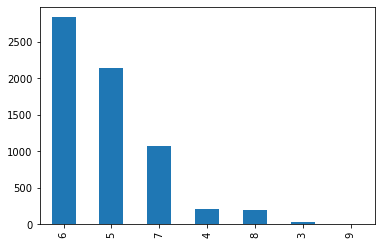

In [4]:
raw_data['quality'].value_counts().plot(kind='bar')
raw_data['quality'].value_counts()

In [6]:
raw_data= raw_data.dropna()

(6463, 13)

### Extracting the dependent and independent variables

In [7]:
import numpy as np
X= raw_data.iloc[:, :-1].values
y= raw_data.iloc[:, -1:]
y= np.ravel(y)

### One hot encoding

In [8]:
import pandas
import numpy
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('encoder', OneHotEncoder(),[0])], remainder='passthrough')   
X= ct.fit_transform(X)

### Standardising the data

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X[:, 2:]=sc.fit_transform(X[:, 2:])

### Train Test split

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Stratified KFold Validation

In [11]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.svm import SVC

linear_ = SVC(kernel='linear',  decision_function_shape='ovo', probability=True)
rbf_ = SVC(kernel='rbf', gamma='auto',  decision_function_shape='ovo', probability=True)
poly_ = SVC(kernel='poly', degree=3,  decision_function_shape='ovo', probability=True)
sig_ = SVC(kernel='sigmoid',  decision_function_shape='ovo', probability=True)

from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

kfold = StratifiedKFold(n_splits=10)
linear_results = cross_validate(linear_, X_train, y_train, cv=kfold, scoring = {'accuracy' : make_scorer(accuracy_score),
'precision' : make_scorer(precision_score, average = 'weighted'),
'recall' : make_scorer(recall_score, average = 'weighted'),
'f1_score' : make_scorer(f1_score, average = 'weighted')})

rbf_results = cross_validate(rbf_, X_train, y_train, cv=kfold, scoring = {'accuracy' : make_scorer(accuracy_score),
'precision' : make_scorer(precision_score, average = 'weighted'),
'recall' : make_scorer(recall_score, average = 'weighted'),
'f1_score' : make_scorer(f1_score, average = 'weighted')})

poly_results = cross_validate(poly_, X_train, y_train, cv=kfold, scoring = {'accuracy' : make_scorer(accuracy_score),
'precision' : make_scorer(precision_score, average = 'weighted'),
'recall' : make_scorer(recall_score, average = 'weighted'),
'f1_score' : make_scorer(f1_score, average = 'weighted')})

sig_results = cross_validate(sig_, X_train, y_train, cv=kfold, scoring = {'accuracy' : make_scorer(accuracy_score),
'precision' : make_scorer(precision_score, average = 'weighted'),
'recall' : make_scorer(recall_score, average = 'weighted'),
'f1_score' : make_scorer(f1_score, average = 'weighted')})

### Regular Model training

In [12]:
from sklearn.svm import SVC
linear = SVC(kernel='linear',  decision_function_shape='ovo', probability=True).fit(X_train, y_train)
rbf = SVC(kernel='rbf', gamma='auto',  decision_function_shape='ovo', probability=True).fit(X_train, y_train)
poly = SVC(kernel='poly', degree=3,  decision_function_shape='ovo', probability=True).fit(X_train, y_train)
sig = SVC(kernel='sigmoid',  decision_function_shape='ovo', probability=True).fit(X_train, y_train)

In [13]:
linear_pred = linear.predict(X_test)
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)
sig_pred = sig.predict(X_test)

Accuracy Linear Kernel: 0.55
Accuracy Polynomial Kernel: 0.56
Accuracy Radial Basis Kernel: 0.58
Accuracy Sigmoid Kernel: 0.42


### Evalution Metrics

In [14]:
from sklearn import metrics
accuracy= metrics.accuracy_score(y_test, linear_pred)
precision= metrics.precision_score(y_test, linear_pred, average= 'micro')
recall= metrics.recall_score(y_test, linear_pred, average= 'micro')
fscore= 2 * ((precision * recall)/ (precision + recall))
print("-----------------LINEAR SVM EVALUATION METRICS--------------")
print("Accuracy:", round(accuracy,2))
print("StratifoldKFoldAccuracy:", str(round(linear_results['test_accuracy'].mean(), 2))+ str(' +/-') + str(round(linear_results['test_accuracy'].std(), 3)))
print("StratifoldKFoldf1score: ", str(round(linear_results['test_f1_score'].mean(), 2)) + str(' +/-') + str(round(linear_results['test_f1_score'].std(), 3)))
print("F-score: ", round(fscore, 2))

-----------------LINEAR SVM EVALUATION METRICS--------------
Accuracy: 0.55
StratifoldKFoldAccuracy: 0.53 +/-0.017
StratifoldKFoldf1score:  0.46 +/-0.016
F-score:  0.55


In [15]:
from sklearn import metrics
accuracy= metrics.accuracy_score(y_test, poly_pred)
precision= metrics.precision_score(y_test, poly_pred, average= 'micro')
recall= metrics.recall_score(y_test, poly_pred, average= 'micro')
fscore= 2 * ((precision * recall)/ (precision + recall))
print("-----------------POLYNOMIAL SVM EVALUATION METRICS--------------")
print("Accuracy:", round(accuracy,2))
print("StratifoldKFoldAccuracy:", str(round(poly_results['test_accuracy'].mean(), 2))+ str(' +/-') + str(round(poly_results['test_accuracy'].std(), 3)))
print("StratifoldKFoldf1score: ", str(round(poly_results['test_f1_score'].mean(), 2)) + str(' +/-') + str(round(poly_results['test_f1_score'].std(), 3)))
print("F-score: ", round(fscore, 2))

-----------------POLYNOMIAL SVM EVALUATION METRICS--------------
Accuracy: 0.56
StratifoldKFoldAccuracy: 0.56 +/-0.023
StratifoldKFoldf1score:  0.52 +/-0.024
F-score:  0.56


In [16]:
from sklearn import metrics
accuracy= metrics.accuracy_score(y_test, rbf_pred)
precision= metrics.precision_score(y_test, rbf_pred, average= 'micro')
recall= metrics.recall_score(y_test, rbf_pred, average= 'micro')
fscore= 2 * ((precision * recall)/ (precision + recall))
print("-----------------RBF SVM EVALUATION METRICS--------------")
print("Accuracy:", round(accuracy,2))
print("StratifoldKFoldAccuracy:", str(round(rbf_results['test_accuracy'].mean(), 2))+ str(' +/-') + str(round(rbf_results['test_accuracy'].std(), 3)))
print("StratifoldKFoldf1score: ", str(round(rbf_results['test_f1_score'].mean(), 2)) + str(' +/-') + str(round(rbf_results['test_f1_score'].std(), 3)))
print("F-score: ", round(fscore, 2))

-----------------RBF SVM EVALUATION METRICS--------------
Accuracy: 0.58
StratifoldKFoldAccuracy: 0.57 +/-0.022
StratifoldKFoldf1score:  0.53 +/-0.021
F-score:  0.58


In [17]:
from sklearn import metrics
accuracy= metrics.accuracy_score(y_test, sig_pred)
precision= metrics.precision_score(y_test, sig_pred, average= 'micro')
recall= metrics.recall_score(y_test, sig_pred, average= 'micro')
fscore= 2 * ((precision * recall)/ (precision + recall))
print("-----------------SIGMOID SVM EVALUATION METRICS--------------")
print("Accuracy:", round(accuracy,2))
print("StratifoldKFoldAccuracy:", str(round(sig_results['test_accuracy'].mean(), 2))+ str(' +/-') + str(round(sig_results['test_accuracy'].std(), 3)))
print("StratifoldKFoldf1score: ", str(round(sig_results['test_f1_score'].mean(), 2)) + str(' +/-') + str(round(sig_results['test_f1_score'].std(), 3)) )
print("F-score: ", round(fscore, 2))

-----------------SIGMOID SVM EVALUATION METRICS--------------
Accuracy: 0.42
StratifoldKFoldAccuracy: 0.42 +/-0.019
StratifoldKFoldf1score:  0.41 +/-0.02
F-score:  0.42


### Confusion Matrix

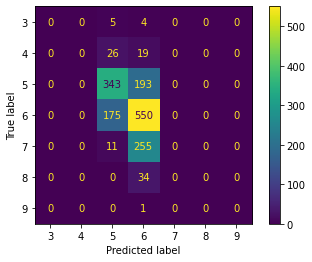

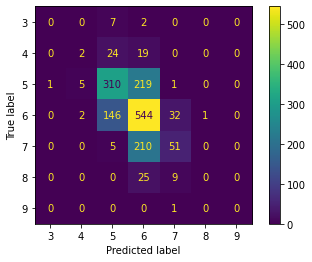

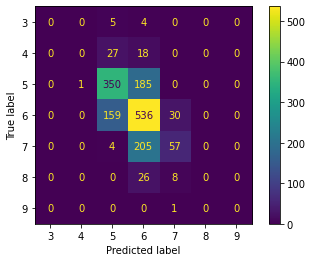

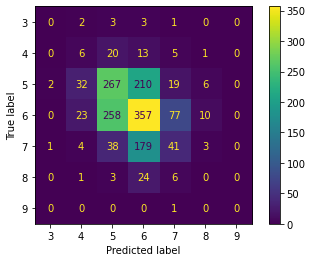

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_lin = confusion_matrix(y_test, linear_pred)
cm_poly = confusion_matrix(y_test, poly_pred)
cm_rbf = confusion_matrix(y_test, rbf_pred)
cm_sig = confusion_matrix(y_test, sig_pred)

cpl= ConfusionMatrixDisplay(confusion_matrix= cm_lin, display_labels=linear.classes_)
cpp= ConfusionMatrixDisplay(confusion_matrix= cm_poly, display_labels=poly.classes_)
cpr= ConfusionMatrixDisplay(confusion_matrix= cm_rbf, display_labels=rbf.classes_)
cps= ConfusionMatrixDisplay(confusion_matrix= cm_sig, display_labels=sig.classes_)
cpl.plot()
cpp.plot()
cpr.plot()
cps.plot()

### ROC AUC Scores

One-vs-One ROC AUC scores:
0.693901 (macro),
0.682990 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.739651 (macro),
0.693240 (weighted by prevalence)


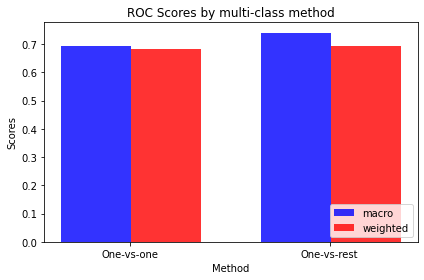

In [53]:
from sklearn.metrics import roc_auc_score
y_prob = linear.predict_proba(X_test)
macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo", average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr", average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

import numpy as np
import matplotlib.pyplot as plt

# data to plot
n_groups = 2
macro = (macro_roc_auc_ovo, macro_roc_auc_ovr )
weighted = (weighted_roc_auc_ovo, weighted_roc_auc_ovr)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, macro, bar_width,
alpha=opacity,
color='b',
label='macro')

rects2 = plt.bar(index + bar_width, weighted, bar_width,
alpha=opacity,
color='r',
label='weighted')

plt.xlabel('Method')
plt.ylabel('Scores')
plt.title('ROC Scores by multi-class method')
plt.xticks(index + 0.17 , ( 'One-vs-one', 'One-vs-rest'))
plt.legend(loc= 'lower right')

plt.tight_layout()
plt.show()

One-vs-One ROC AUC scores:
0.782121 (macro),
0.783220 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.819854 (macro),
0.752236 (weighted by prevalence)


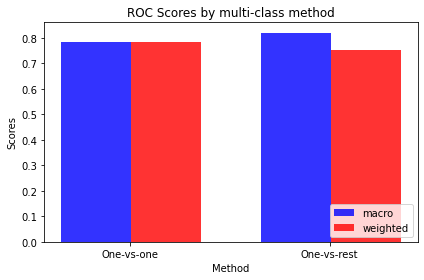

In [54]:
from sklearn.metrics import roc_auc_score
y_prob = rbf.predict_proba(X_test)
macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo", average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr", average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

import numpy as np
import matplotlib.pyplot as plt

# data to plot
n_groups = 2
macro = (macro_roc_auc_ovo, macro_roc_auc_ovr )
weighted = (weighted_roc_auc_ovo, weighted_roc_auc_ovr)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, macro, bar_width,
alpha=opacity,
color='b',
label='macro')

rects2 = plt.bar(index + bar_width, weighted, bar_width,
alpha=opacity,
color='r',
label='weighted')

plt.xlabel('Method')
plt.ylabel('Scores')
plt.title('ROC Scores by multi-class method')
plt.xticks(index + 0.17 , ( 'One-vs-one', 'One-vs-rest'))
plt.legend(loc= 'lower right')

plt.tight_layout()
plt.show()

One-vs-One ROC AUC scores:
0.747498 (macro),
0.760496 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.795317 (macro),
0.739389 (weighted by prevalence)


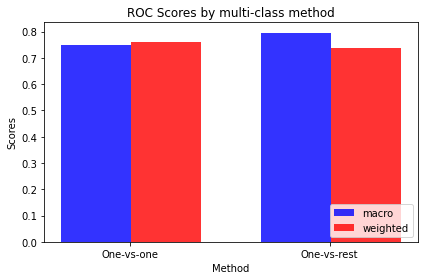

In [55]:
from sklearn.metrics import roc_auc_score
y_prob = poly.predict_proba(X_test)
macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo", average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr", average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

import numpy as np
import matplotlib.pyplot as plt

# data to plot
n_groups = 2
macro = (macro_roc_auc_ovo, macro_roc_auc_ovr )
weighted = (weighted_roc_auc_ovo, weighted_roc_auc_ovr)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, macro, bar_width,
alpha=opacity,
color='b',
label='macro')

rects2 = plt.bar(index + bar_width, weighted, bar_width,
alpha=opacity,
color='r',
label='weighted')

plt.xlabel('Method')
plt.ylabel('Scores')
plt.title('ROC Scores by multi-class method')
plt.xticks(index + 0.17 , ( 'One-vs-one', 'One-vs-rest'))
plt.legend(loc= 'lower right')

plt.tight_layout()
plt.show()

One-vs-One ROC AUC scores:
0.654844 (macro),
0.649798 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.691631 (macro),
0.603083 (weighted by prevalence)


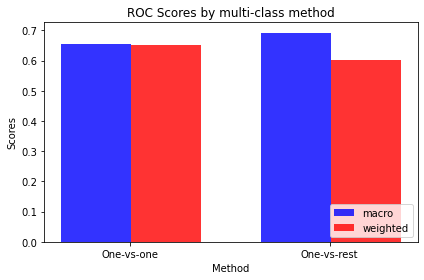

In [56]:
from sklearn.metrics import roc_auc_score
y_prob = sig.predict_proba(X_test)
macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo", average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr", average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

import numpy as np
import matplotlib.pyplot as plt

# data to plot
n_groups = 2
macro = (macro_roc_auc_ovo, macro_roc_auc_ovr )
weighted = (weighted_roc_auc_ovo, weighted_roc_auc_ovr)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, macro, bar_width,
alpha=opacity,
color='b',
label='macro')

rects2 = plt.bar(index + bar_width, weighted, bar_width,
alpha=opacity,
color='r',
label='weighted')

plt.xlabel('Method')
plt.ylabel('Scores')
plt.title('ROC Scores by multi-class method')
plt.xticks(index + 0.17 , ( 'One-vs-one', 'One-vs-rest'))
plt.legend(loc= 'lower right')

plt.tight_layout()
plt.show()